<a href="https://colab.research.google.com/github/Leerish/Melanoma-ML-Project/blob/main/Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Problem
## Melanoma - Skin Cancer Prediction
Melanoma is a type of skin cancer that develops in the cells called melanocytes, which are responsible for producing melanin, the pigment that gives color to the skin, hair, and eyes. Melanoma is considered the most **dangerous type of skin cancer** because it has the potential to spread to other parts of the body.

Using machine learning (ML) models for identifying melanoma has become increasingly important for several reasons:

1. **Early Detection:** Early detection is crucial in the successful treatment of melanoma. ML models can be trained on large datasets of skin images, helping them learn patterns and features indicative of melanoma. This enables the model to detect potential cases at an early stage when treatment is more likely to be successful.

2. **Automation and Efficiency:** ML models can automate the process of analyzing skin lesions, making the identification of potential melanomas more efficient. This is particularly important given the increasing prevalence of skin cancer and the need for timely assessments.

3. **Objective Analysis:** ML models provide an objective and consistent analysis of skin lesions. Human interpretation can vary, and different dermatologists may reach different conclusions. ML models, when properly trained, can provide a standardized and unbiased assessment.

4. **Handling Large Datasets:** ML models excel at handling large datasets, which is essential for training models effectively. Dermatologists may not have access to as extensive and diverse a dataset as is required for training a robust model.

5. **Improving Accuracy:** ML models, when trained on diverse datasets, can achieve high levels of accuracy in identifying melanoma. This can potentially reduce the number of false negatives and false positives, leading to better diagnostic outcomes.

6. **Assisting Healthcare Professionals:** ML models can serve as valuable tools for healthcare professionals, providing them with additional information and support in their decision-making process. This collaboration between human expertise and machine learning can enhance the overall diagnostic capabilities.


**Disclaimer**
It's important to note that while ML models can be powerful tools, they should be used as aids to healthcare professionals rather than replacements. The final diagnosis and treatment decisions should always be made by experienced medical professionals. Additionally, ensuring the ethical use of such technologies, including considerations of privacy and biases in the data, is crucial in the development and deployment of ML models for medical purposes.



# Designing an approach to develop a solution

In this notebook we train model(s) to address the problem of the identifying melanoma amongst the patients based on images of lesions on skin

To serve this purpose wee will be using data from www.kaggle.com

Dataset: https://www.kaggle.com/datasets/drscarlat/melanoma

The data in the above link is loaded into this notebook via kaggle's API


This is a **Binary Classification Problem**



## Checking the version of TensorFlow

Since we deal with image dataset we will be using TensorFlow version 2.x

In [4]:
import tensorflow as tf

print(tf.__version__)

2.15.0


### Importing Helper Functions

In [5]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-27 06:50:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-27 06:50:40 (104 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [6]:
from helper_functions import plot_loss_curves , unzip_data , compare_historys , walk_through_dir

### Setting up Kaggle API to load Data

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [8]:
!kaggle datasets download -d drscarlat/melanoma

melanoma.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
unzip_data("melanoma.zip")

## Exploratory Data Analysis

This step includes
* Looking into the data i,e checking the image data type(JPG, JPEG ,BMP ,HEIF)
* Walking through different directories
* Checking images in each directories
* Visualising them to get a clear cut understanding

In [10]:
!ls DermMel


test  train_sep  valid


In [11]:
!ls DermMel/train_sep/Melanoma

AUG_0_0.jpeg	 AUG_0_3380.jpeg  AUG_0_5768.jpeg  AUG_0_9418.jpeg	  AUGmented_0_7210.jpeg
AUG_0_100.jpeg	 AUG_0_3381.jpeg  AUG_0_5769.jpeg  AUG_0_9437.jpeg	  AUGmented_0_7214.jpeg
AUG_0_1011.jpeg  AUG_0_3383.jpeg  AUG_0_576.jpeg   AUG_0_9438.jpeg	  AUGmented_0_7216.jpeg
AUG_0_1013.jpeg  AUG_0_3386.jpeg  AUG_0_5770.jpeg  AUG_0_9439.jpeg	  AUGmented_0_7220.jpeg
AUG_0_1018.jpeg  AUG_0_3387.jpeg  AUG_0_5772.jpeg  AUG_0_9440.jpeg	  AUGmented_0_7226.jpeg
AUG_0_1019.jpeg  AUG_0_338.jpeg   AUG_0_5774.jpeg  AUG_0_9441.jpeg	  AUGmented_0_7233.jpeg
AUG_0_1025.jpeg  AUG_0_3391.jpeg  AUG_0_5775.jpeg  AUG_0_9446.jpeg	  AUGmented_0_7237.jpeg
AUG_0_1028.jpeg  AUG_0_3392.jpeg  AUG_0_5776.jpeg  AUG_0_9448.jpeg	  AUGmented_0_7246.jpeg
AUG_0_102.jpeg	 AUG_0_3393.jpeg  AUG_0_5779.jpeg  AUG_0_9451.jpeg	  AUGmented_0_7253.jpeg
AUG_0_1032.jpeg  AUG_0_3394.jpeg  AUG_0_577.jpeg   AUG_0_9452.jpeg	  AUGmented_0_725.jpeg
AUG_0_1036.jpeg  AUG_0_3395.jpeg  AUG_0_5781.jpeg  AUG_0_9463.jpeg	  AUGmented_0_7262.jpeg
AUG_0

### Getting info about images in each directory

In [12]:
import os

for dirpath, dirnames , filenames in os.walk("DermMel"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'DermMel'.
There are 2 directories and 0 images in 'DermMel/valid'.
There are 0 directories and 1781 images in 'DermMel/valid/Melanoma'.
There are 0 directories and 1781 images in 'DermMel/valid/NotMelanoma'.
There are 2 directories and 0 images in 'DermMel/train_sep'.
There are 0 directories and 5341 images in 'DermMel/train_sep/Melanoma'.
There are 0 directories and 5341 images in 'DermMel/train_sep/NotMelanoma'.
There are 2 directories and 0 images in 'DermMel/test'.
There are 0 directories and 1781 images in 'DermMel/test/Melanoma'.
There are 0 directories and 1780 images in 'DermMel/test/NotMelanoma'.


In [13]:
import pathlib
import numpy as np

data_dir = pathlib.Path("DermMel/train_sep/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['Melanoma' 'NotMelanoma']


### Visualising Random Images

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  target_folder = target_dir+target_class

  #get random image path
  random_image = random.sample(os.listdir(target_folder) , 1)

  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape:{img.shape}") # shows the shape of image

  return img

Image Shape:(224, 224, 3)


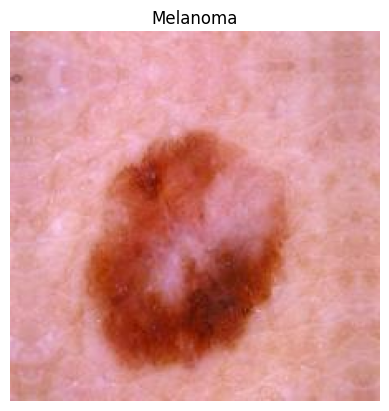

In [15]:
img = view_random_image(target_dir = "DermMel/train_sep/" , target_class ="Melanoma")

In [16]:
# Viewing image as a tensor
img

array([[[207, 140, 158],
        [211, 144, 161],
        [216, 150, 164],
        ...,
        [223, 162, 177],
        [222, 160, 175],
        [222, 160, 175]],

       [[219, 152, 170],
        [222, 155, 172],
        [225, 159, 173],
        ...,
        [222, 161, 176],
        [221, 159, 174],
        [220, 158, 171]],

       [[217, 152, 172],
        [219, 155, 172],
        [220, 156, 172],
        ...,
        [221, 161, 173],
        [219, 157, 170],
        [218, 156, 167]],

       ...,

       [[224, 158, 170],
        [220, 154, 164],
        [216, 151, 157],
        ...,
        [203, 138, 134],
        [207, 144, 139],
        [210, 147, 142]],

       [[215, 151, 165],
        [212, 149, 160],
        [212, 149, 157],
        ...,
        [203, 138, 132],
        [208, 143, 137],
        [212, 147, 141]],

       [[205, 141, 155],
        [204, 141, 152],
        [206, 143, 152],
        ...,
        [206, 141, 135],
        [211, 146, 140],
        [215, 150, 144]]

In [17]:
# Check the shape of image
img.shape

(224, 224, 3)

In [18]:
# Normalizing the pixel values

img/255.

array([[[0.81176471, 0.54901961, 0.61960784],
        [0.82745098, 0.56470588, 0.63137255],
        [0.84705882, 0.58823529, 0.64313725],
        ...,
        [0.8745098 , 0.63529412, 0.69411765],
        [0.87058824, 0.62745098, 0.68627451],
        [0.87058824, 0.62745098, 0.68627451]],

       [[0.85882353, 0.59607843, 0.66666667],
        [0.87058824, 0.60784314, 0.6745098 ],
        [0.88235294, 0.62352941, 0.67843137],
        ...,
        [0.87058824, 0.63137255, 0.69019608],
        [0.86666667, 0.62352941, 0.68235294],
        [0.8627451 , 0.61960784, 0.67058824]],

       [[0.85098039, 0.59607843, 0.6745098 ],
        [0.85882353, 0.60784314, 0.6745098 ],
        [0.8627451 , 0.61176471, 0.6745098 ],
        ...,
        [0.86666667, 0.63137255, 0.67843137],
        [0.85882353, 0.61568627, 0.66666667],
        [0.85490196, 0.61176471, 0.65490196]],

       ...,

       [[0.87843137, 0.61960784, 0.66666667],
        [0.8627451 , 0.60392157, 0.64313725],
        [0.84705882, 0

### Preprocessing Images

Here we use `ImageDataGenerator` to preprocess the images
which includes
* Normalizing the data values ( bringing them between 0 and 1)
* Reshaping images of size `IMG_SIZ =224` which results in shape of `(224,224,3)`with three color channels
* Splitting them into training and validation batches

In [19]:
# Preprocessing the image
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting random seed
tf.random.set_seed(42)

# Preprocessing data

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train and test directories
train_dir ="DermMel/train_sep/"
test_dir = "DermMel/test"

# Turn data into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size =(224 ,224),# Images of sizes 224 x 224
                                               class_mode="binary",#type of problem we working with
                                               seed = 42)

valid_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size =(224 ,224),# Images of sizes 224 x 224
                                               class_mode="binary",#type of problem we working with
                                               seed = 42)

Found 10682 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [20]:
# Getting a sample of the training data batch

images , labels = train_data.next()
len(images) , len(labels)

(32, 32)

In [21]:
# Get first 2 images

images[:2] , images[0].shape

(array([[[[0.60784316, 0.49411768, 0.47058827],
          [0.6117647 , 0.5058824 , 0.4784314 ],
          [0.61960787, 0.50980395, 0.49411768],
          ...,
          [0.6       , 0.4784314 , 0.40000004],
          [0.6117647 , 0.47058827, 0.40784317],
          [0.60784316, 0.48627454, 0.40784317]],
 
         [[0.60784316, 0.49803925, 0.454902  ],
          [0.6156863 , 0.5019608 , 0.4784314 ],
          [0.6117647 , 0.49411768, 0.48627454],
          ...,
          [0.6039216 , 0.47450984, 0.4156863 ],
          [0.60784316, 0.48627454, 0.40784317],
          [0.6       , 0.48627454, 0.43137258]],
 
         [[0.6117647 , 0.49803925, 0.4666667 ],
          [0.62352943, 0.5176471 , 0.47450984],
          [0.62352943, 0.50980395, 0.48627454],
          ...,
          [0.6       , 0.48627454, 0.43137258],
          [0.6       , 0.48627454, 0.43137258],
          [0.6039216 , 0.48235297, 0.40000004]],
 
         ...,
 
         [[0.49803925, 0.3921569 , 0.34901962],
          [0.50588

In [22]:
# View first batch of labels
labels

array([1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

## Modelling

### Modelling approach : 1

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [24]:
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [25]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [26]:

# Get a summary of our model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# Fit the model
# Check the lengths of training and test data generators
len(train_data), len(valid_data)

(334, 112)

In [28]:

# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
334/334 [==============================] - 121s 339ms/step - loss: 0.6690 - accuracy: 0.6394 - val_loss: 0.5734 - val_accuracy: 0.6852
Epoch 2/5
334/334 [==============================] - 71s 212ms/step - loss: 0.5521 - accuracy: 0.7158 - val_loss: 0.5507 - val_accuracy: 0.7206
Epoch 3/5
334/334 [==============================] - 69s 208ms/step - loss: 0.5100 - accuracy: 0.7480 - val_loss: 0.4848 - val_accuracy: 0.7739
Epoch 4/5
334/334 [==============================] - 69s 206ms/step - loss: 0.4324 - accuracy: 0.8033 - val_loss: 0.4572 - val_accuracy: 0.7779
Epoch 5/5
334/334 [==============================] - 69s 205ms/step - loss: 0.2208 - accuracy: 0.9214 - val_loss: 0.2298 - val_accuracy: 0.9188


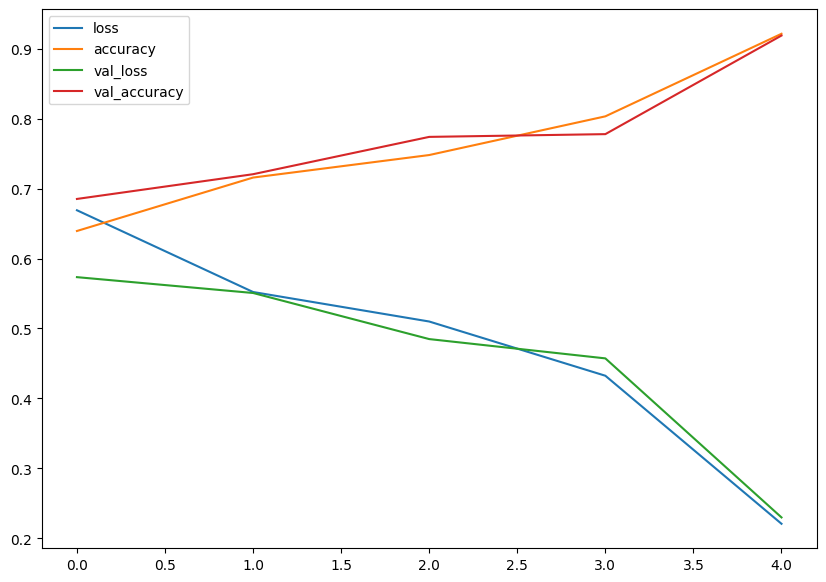

In [29]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [30]:

# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


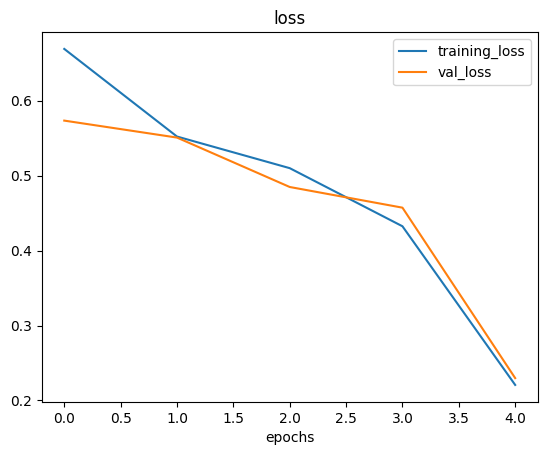

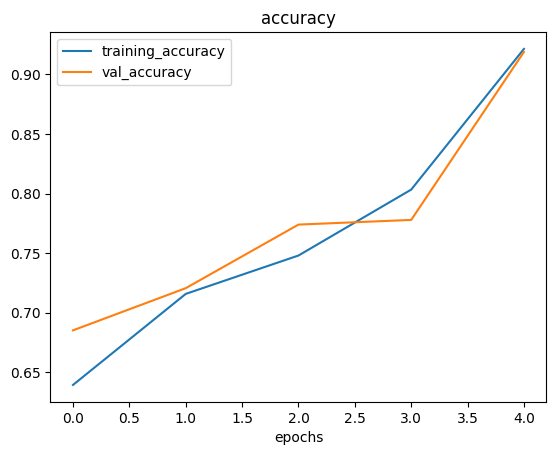

In [31]:

# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)


### Modelling approach : 2

In [32]:

# Create the model (this is going to be our new baseline)
model_2 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [33]:

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
334/334 [==============================] - 69s 198ms/step - loss: 0.5918 - accuracy: 0.6683 - val_loss: 0.5378 - val_accuracy: 0.7099
Epoch 2/5
334/334 [==============================] - 67s 201ms/step - loss: 0.5127 - accuracy: 0.7358 - val_loss: 0.7051 - val_accuracy: 0.6274
Epoch 3/5
334/334 [==============================] - 65s 194ms/step - loss: 0.4535 - accuracy: 0.7852 - val_loss: 0.4550 - val_accuracy: 0.7723
Epoch 4/5
334/334 [==============================] - 67s 200ms/step - loss: 0.3959 - accuracy: 0.8254 - val_loss: 0.4739 - val_accuracy: 0.7840
Epoch 5/5
334/334 [==============================] - 67s 200ms/step - loss: 0.3537 - accuracy: 0.8503 - val_loss: 0.3130 - val_accuracy: 0.8759


In [35]:
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

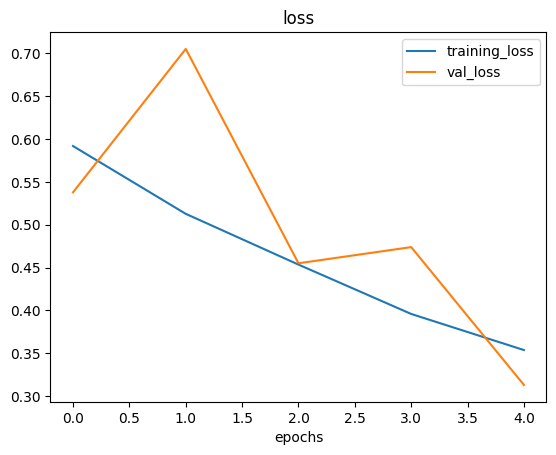

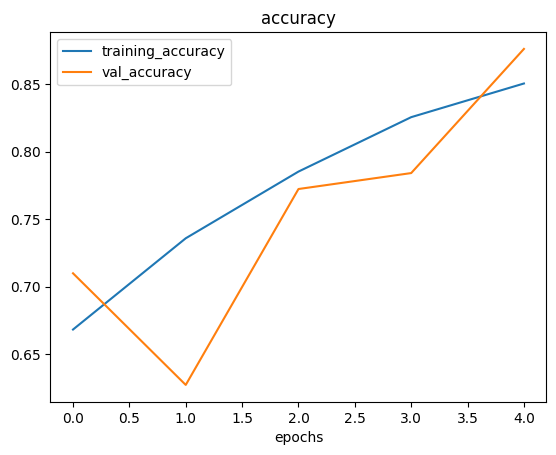

In [36]:
# Plot loss curves
plot_loss_curves(history_2)


### Data Augmentation

The performance of above trained model could be improved by performing data augmentation such as
* Rescale
* Rotate
* Zoom
* Flip and etc

This would make the data  way easier for our model to learn and predict

In [37]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

### Here we are following 2 methods
1. Data augmentation **without shuffling the data**
2. Data augmentation **with shuffling the data**

### Data Augmentation without Shuffling the data

In [38]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 10682 images belonging to 2 classes.
Non-augmented training data:
Found 10682 images belonging to 2 classes.
Non-augmented test data:
Found 3561 images belonging to 2 classes.


In [39]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 6


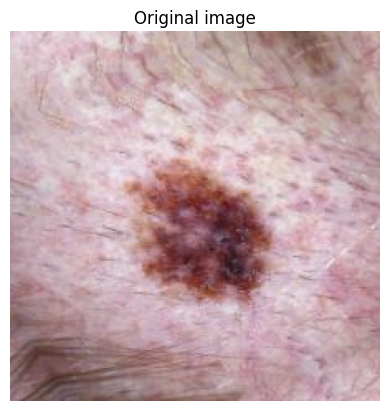

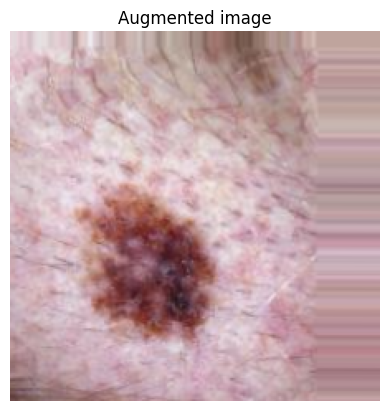

In [40]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [41]:
# Create a model (same as model_2)
model_3 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # fitting model_3 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
334/334 [==============================] - 174s 515ms/step - loss: 0.7089 - accuracy: 0.5079 - val_loss: 0.6928 - val_accuracy: 0.6069
Epoch 2/5
334/334 [==============================] - 171s 512ms/step - loss: 0.6929 - accuracy: 0.5099 - val_loss: 0.6910 - val_accuracy: 0.6290
Epoch 3/5
334/334 [==============================] - 173s 518ms/step - loss: 0.6997 - accuracy: 0.5449 - val_loss: 0.6884 - val_accuracy: 0.5510
Epoch 4/5
334/334 [==============================] - 174s 522ms/step - loss: 0.6987 - accuracy: 0.5366 - val_loss: 0.6900 - val_accuracy: 0.5136
Epoch 5/5
334/334 [==============================] - 174s 521ms/step - loss: 0.7124 - accuracy: 0.5629 - val_loss: 0.6931 - val_accuracy: 0.5055


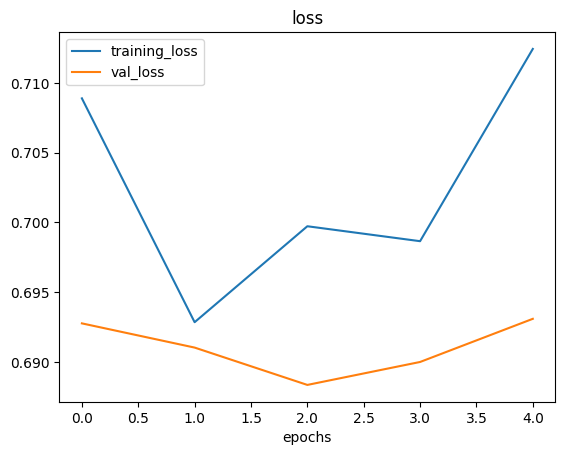

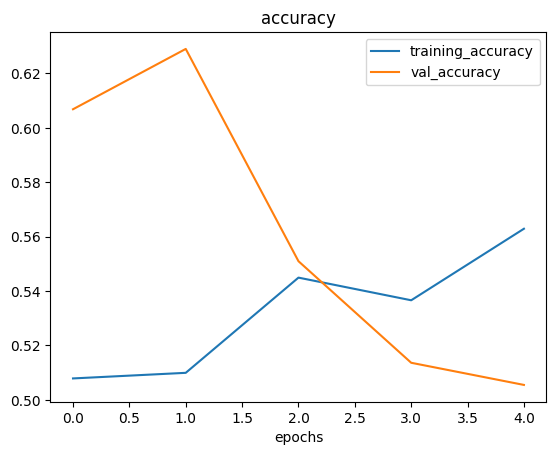

In [42]:
# Check our models training curves
plot_loss_curves(history_3)

### Training the same model by Shuffling the dataset

In [44]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # Shuffing dataset

Found 10682 images belonging to 2 classes.


In [45]:

# Create the model (same as model_2 and model_3)
model_4 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
334/334 [==============================] - 178s 529ms/step - loss: 0.6232 - accuracy: 0.6359 - val_loss: 0.5718 - val_accuracy: 0.6838
Epoch 2/5
334/334 [==============================] - 171s 512ms/step - loss: 0.5662 - accuracy: 0.6876 - val_loss: 0.5395 - val_accuracy: 0.7057
Epoch 3/5
334/334 [==============================] - 171s 513ms/step - loss: 0.5216 - accuracy: 0.7219 - val_loss: 0.5265 - val_accuracy: 0.7360
Epoch 4/5
334/334 [==============================] - 172s 514ms/step - loss: 0.4892 - accuracy: 0.7586 - val_loss: 0.4473 - val_accuracy: 0.7950
Epoch 5/5
334/334 [==============================] - 172s 515ms/step - loss: 0.4494 - accuracy: 0.7884 - val_loss: 0.4236 - val_accuracy: 0.8090


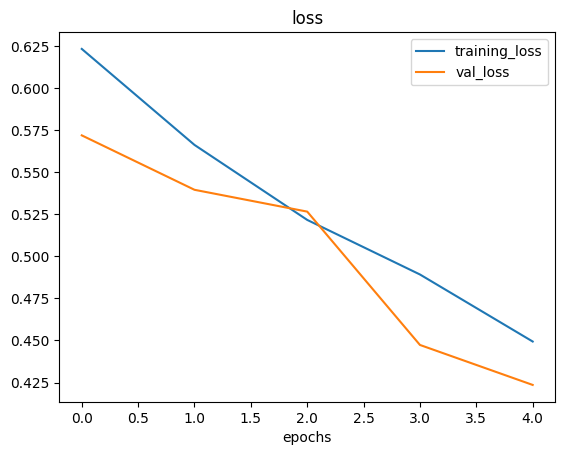

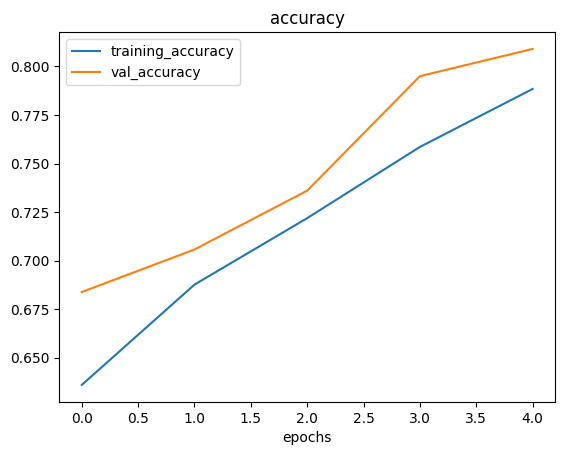

In [46]:

# Plot loss curves
plot_loss_curves(history_4)

### Making Predictions
This the testing section , here we will be testing our model with random images from a different directory of same dataset

In [47]:
# Classes we're working with
print(class_names)

['Melanoma' 'NotMelanoma']


### Testing our trained model with a random image from a different data set

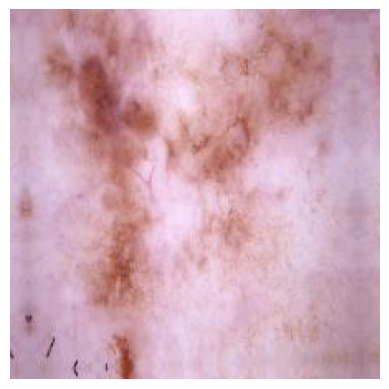

In [77]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread("/content/DermMel/valid/Melanoma/AUG_0_1009.jpeg")
plt.imshow(image)
plt.axis(False);

In [78]:
image.shape

(224, 224, 3)

In [54]:
image

array([[[184, 144, 168],
        [186, 146, 170],
        [188, 148, 172],
        ...,
        [168, 125, 153],
        [169, 129, 156],
        [174, 134, 161]],

       [[184, 144, 168],
        [186, 146, 170],
        [187, 147, 171],
        ...,
        [170, 127, 155],
        [169, 129, 156],
        [174, 134, 161]],

       [[183, 143, 167],
        [184, 144, 168],
        [186, 146, 170],
        ...,
        [176, 133, 160],
        [176, 133, 161],
        [179, 136, 164]],

       ...,

       [[183, 149, 166],
        [184, 150, 167],
        [181, 147, 164],
        ...,
        [181, 147, 164],
        [181, 147, 164],
        [180, 146, 163]],

       [[182, 148, 165],
        [184, 150, 167],
        [183, 149, 166],
        ...,
        [181, 148, 167],
        [180, 147, 166],
        [180, 147, 166]],

       [[182, 148, 165],
        [185, 151, 168],
        [184, 150, 167],
        ...,
        [181, 148, 167],
        [181, 148, 167],
        [180, 147, 166]]

In [79]:
# Rescaling our image

# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [80]:
load_and_prep_image("/content/DermMel/valid/Melanoma/AUG_0_1009.jpeg")

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.72156864, 0.5686275 , 0.6509804 ],
        [0.7294118 , 0.5764706 , 0.65882355],
        [0.73333335, 0.5803922 , 0.6627451 ],
        ...,
        [0.6509804 , 0.49411765, 0.59607846],
        [0.65882355, 0.5019608 , 0.60784316],
        [0.68235296, 0.5254902 , 0.6313726 ]],

       [[0.72156864, 0.5686275 , 0.6509804 ],
        [0.7254902 , 0.57254905, 0.654902  ],
        [0.73333335, 0.5803922 , 0.6627451 ],
        ...,
        [0.65882355, 0.5019608 , 0.6039216 ],
        [0.6627451 , 0.5058824 , 0.6117647 ],
        [0.6784314 , 0.52156866, 0.627451  ]],

       [[0.7176471 , 0.5647059 , 0.64705884],
        [0.72156864, 0.5686275 , 0.6509804 ],
        [0.7254902 , 0.57254905, 0.654902  ],
        ...,
        [0.68235296, 0.5254902 , 0.627451  ],
        [0.68235296, 0.5254902 , 0.627451  ],
        [0.6901961 , 0.53333336, 0.63529414]],

       ...,

       [[0.7176471 , 0.58431375, 0.64705884],
        [0.72

In [81]:
img.shape

TensorShape([224, 224, 3])

In [82]:
pred = model_4.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 20ms/step


array([[0.17750141]], dtype=float32)

In [83]:
class_names

array(['Melanoma', 'NotMelanoma'], dtype='<U11')

In [84]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'Melanoma'

In [69]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


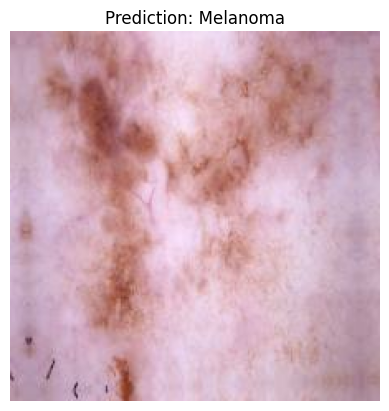

In [90]:
# Test our model on a custom image
pred_and_plot(model_4, "/content/DermMel/valid/Melanoma/AUG_0_1009.jpeg")

**Note:** Our model is predicting correctly , the above prediction is correct.this model has an accuracy of 81% on the test dataset